## 1.0 - Importing libraries

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore') 
pd.option_context('display.max_rows', None)
sns.set(style="whitegrid")

## 2.0 - Data Reading

In [2]:
infutor_dataset = pd.read_csv('../infutor_enrichment_dataset.csv', sep=',')
leads_dataset = pd.read_csv('../leads_dataset.csv', sep=',')
zip_code_dataset = pd.read_csv('../zip_code_dataset.csv', sep=',')

leads_dataset = leads_dataset.dropna(subset=['IS_APPOINTMENT_SET'])

In [3]:
infutor_dataset

,Unnamed: 0,HASHED_PHONE_NUMBER,MATCHLEVEL,ATTRIBUTES_CONNEXSEGMENTATION_CT_HOMEIMPROVE12_ANY,ATTRIBUTES_CONNEXSEGMENTATION_CT_HOMEREMODEL12_ANY,ATTRIBUTES_COREDEMOGRAPHICS_DOB,ATTRIBUTES_COREDEMOGRAPHICS_GENDER,ATTRIBUTES_COREDEMOGRAPHICS_MARRIEDCD,ATTRIBUTES_COREDEMOGRAPHICS_WEALTHSCR,ATTRIBUTES_COREDEMOGRAPHICS_HOMEOWNERCD,...,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_DEALSEEK,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_OFFLINE,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_QUALSEEK,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_STRAITFWD,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_TRAD,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_INTERNET,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_MAGAZINE,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_NEWSPAPER,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_RADIO,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_TV
0,0,9a99e383ee68a51c2740de9883f5b1bee5d2a4da,1,NaN,Y,197010.0,M,M,A,H,...,Y,Y,NaN,Y,NaN,Y,Y,NaN,Y,NaN
1,1,0020b0a911711b66c100d7e8e25e226783bb0072,5,NaN,NaN,194702.0,M,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,d436912ed29db2950ca13b64cc56fefc0f581f7a,1,NaN,NaN,196410.0,F,M,E,H,...,Y,Y,Y,NaN,NaN,Y,NaN,NaN,NaN,Y
3,3,c2bd44a987bc7b9663352235ea2b7bb04b696697,5,NaN,NaN,NaN,F,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,c363fb2c7bbdd728928716b4d5b4a80a13cbd2f2,1,NaN,NaN,197009.0,M,S,D,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178576,178576,49eabc5f57579b3801bce715ac80996bb3e6d3ea,1,NaN,NaN,198903.0,F,S,A,H,...,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,Y,NaN
178577,178577,26f0b4294af5bb517a77476e430a36726f82341d,1,NaN,NaN,195808.0,F,M,M,H,...,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178578,178578,c630cac86df02fe941a01de6410c1391025daf22,1,NaN,NaN,194204.0,M,S,H,H,...,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN
178579,178579,2a6b007a4eecf61b1ed6cf328c75ff2f7e4d73b6,1,Y,Y,196704.0,F,M,J,H,...,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
leads_dataset

,HASHED_PHONE_NUMBER,IS_APPOINTMENT_SET,LEAD_CREATED_AT_UTC,ZIP_CODE,CITY,STATE,COUNTY,EMAIL_DOMAIN,OPERATINGSYSTEMCLASS,OPERATINGSYSTEMNAME,...,AGENTVERSIONMAJOR,DEVICEBRAND,DEVICEFIRMWAREVERSION,DEVICENAME,DEVICEVERSION,FACEBOOKDEVICECLASS,LAYOUTENGINENAME,NETWORKTYPE,OPERATINGSYSTEMVERSIONMAJOR,WEBVIEWAPPNAME
0,16bc446a779996bf3007065819f1dd4692a17d14,True,2023-07-18T15:11:55Z,61080.0,South Beloit,IL,Winnebago,gmail.com,Mobile,Android,...,114,Samsung,NaN,Samsung SM-A546V,NaN,NaN,Blink,Unknown,13,Newsbreak
1,6d30f0d0f87d39f8c178e3750072eef79bb9d7a0,False,2022-09-19T18:37:21Z,33914.0,Cape Coral,FL,Lee,gmail.com,Mobile,iOS,...,605,Apple,19G71,Apple iPhone,iPhone 13 Pro Max,phone,AppleWebKit,Unknown,15,Facebook App for iOS
2,9de207ef32d3696829ae369c2a9a4500cd36ec43,True,2022-11-09T21:38:10Z,42055.0,Kuttawa,KY,Lyon,gmail.com,Mobile,Android,...,105,Samsung,NaN,Samsung SM-G991U,NaN,NaN,Blink,Unknown,12,Facebook App for Android
3,31bb43ece722562df3a163ba94be4eb2ccd1bf71,False,2022-11-13T15:41:31Z,43701.0,Zanesville,OH,Muskingum,gmail.com,Mobile,iOS,...,605,Apple,19G82,Apple iPhone,iPhone 13,phone,AppleWebKit,Unknown,15,Facebook App for iOS
4,674de0e7b4da1c9945422b248f94cbf2499d59e2,False,2022-10-07T17:56:51Z,22206.0,Arlington,VA,Arlington,gmail.com,Mobile,iOS,...,605,Apple,20A380,Apple iPhone,iPhone XR,phone,AppleWebKit,Unknown,16,Facebook App for iOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308955,85580be57f0c2e3785ffe5b6187441487915513b,True,2023-07-10T13:55:13Z,2151.0,Revere,MA,Suffolk,yahoo.com,Mobile,iOS,...,114,Apple,15E148,Apple iPhone,iPhone,NaN,AppleWebKit,Unknown,16,Unknown
308956,8e7eed2ca3dd2e5a0f27fb3288e0157471a5f81b,False,2023-05-12T13:54:23Z,3867.0,Rochester,NH,Strafford,icloud.com,Desktop,Mac OS,...,16,Apple,NaN,Apple Macintosh,NaN,NaN,AppleWebKit,Unknown,10.15,Unknown
308957,f1864c915f0cdf097a794f50a027f84af31f79b2,False,2023-04-25T20:08:59Z,89084.0,North Las Vegas,NV,Clark,juno.com,Mobile,Android,...,112,Samsung,NaN,Samsung SM-G981V,NaN,NaN,Blink,Unknown,13,Facebook App for Android
308958,e69897a60b18857a0e63558f3a86051321f16acf,False,2023-02-02T20:22:57Z,44663.0,New Philadelphia,OH,Tuscarawas,live.com,Mobile,Android,...,104,Samsung,NaN,Samsung SM-S901U,NaN,NaN,Blink,Unknown,13,Unknown


In [5]:
zip_code_dataset

,ZIP_CODE,Alchemist,Ancient Apparition,Anti-Mage,Axe,Batrider,Beastmaster,Chaos Knight,Chen,Clinkz,...,Dragon Knight,Drow Ranger,Earth Spirit,Earthshaker,Elder Titan,Ember Spirit,Enchantress,Enigma,Faceless Void,Pudge
0,47327.0,2065.0,1403.0,40.5,42.1,18.0,7.0,93.0,62.0,26.0,...,1081.0,840.0,16.0,14.0,25.0,12.0,76.0,83.0,3.0,1952.0
1,71268.0,347.0,257.0,40.6,40.6,17.0,7.0,93.0,62.0,34.0,...,1205.0,910.0,21.0,21.0,31.0,16.0,90.0,74.0,0.0,1991.0
2,27828.0,3581.0,2519.0,39.2,38.8,17.0,10.0,90.0,59.0,29.0,...,1533.0,1288.0,24.0,20.0,34.0,21.0,68.0,73.0,3.0,1990.0
3,30143.0,7863.0,5681.0,46.4,49.5,27.0,2.0,98.0,75.0,29.0,...,2654.0,2445.0,9.0,9.0,14.0,9.0,79.0,84.0,1.0,1994.0
4,25564.0,90.0,77.0,37.4,36.8,20.0,2.0,98.0,77.0,16.0,...,1545.0,1125.0,0.0,22.0,0.0,0.0,80.0,68.0,0.0,1987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19687,26711.0,39.0,26.0,42.8,44.2,19.0,5.0,95.0,69.0,26.0,...,1886.0,1906.0,23.0,13.0,33.0,18.0,77.0,86.0,0.0,1992.0
19688,43338.0,1002.0,835.0,39.2,40.0,18.0,4.0,96.0,69.0,39.0,...,1412.0,1287.0,10.0,7.0,13.0,6.0,84.0,80.0,0.0,1984.0
19689,94941.0,13144.0,8479.0,44.3,47.7,21.0,4.0,96.0,64.0,22.0,...,16373.0,14479.0,5.0,5.0,3.0,1.0,69.0,80.0,3.0,1962.0
19690,46392.0,1354.0,1068.0,38.5,38.1,16.0,3.0,97.0,79.0,40.0,...,1708.0,1586.0,7.0,8.0,8.0,6.0,81.0,85.0,5.0,1991.0


Given the objective of predicting *IS_APPOINTMENT_SET*, a Left Join of the leads_dataset with the infutor_enrichment_dataset using HASHED_PHONE_NUMBER as the key seems to be the most suitable. This will ensure that all leads are kept in the analysis, enriching them with additional data when available.

In [6]:
merged_dataset = pd.merge(leads_dataset, infutor_dataset, on='HASHED_PHONE_NUMBER', how='left')
full_dataset = pd.merge(merged_dataset, zip_code_dataset, on='ZIP_CODE', how='left')

In [7]:
full_dataset

,HASHED_PHONE_NUMBER,IS_APPOINTMENT_SET,LEAD_CREATED_AT_UTC,ZIP_CODE,CITY,STATE,COUNTY,EMAIL_DOMAIN,OPERATINGSYSTEMCLASS,OPERATINGSYSTEMNAME,...,Dragon Knight,Drow Ranger,Earth Spirit,Earthshaker,Elder Titan,Ember Spirit,Enchantress,Enigma,Faceless Void,Pudge
0,16bc446a779996bf3007065819f1dd4692a17d14,True,2023-07-18T15:11:55Z,61080.0,South Beloit,IL,Winnebago,gmail.com,Mobile,Android,...,1385.0,1244.0,7.0,10.0,13.0,4.0,71.0,87.0,3.0,1984.0
1,6d30f0d0f87d39f8c178e3750072eef79bb9d7a0,False,2022-09-19T18:37:21Z,33914.0,Cape Coral,FL,Lee,gmail.com,Mobile,iOS,...,3253.0,2845.0,9.0,8.0,15.0,6.0,78.0,83.0,3.0,1998.0
2,9de207ef32d3696829ae369c2a9a4500cd36ec43,True,2022-11-09T21:38:10Z,42055.0,Kuttawa,KY,Lyon,gmail.com,Mobile,Android,...,1400.0,1098.0,16.0,6.0,31.0,12.0,91.0,60.0,0.0,1981.0
3,31bb43ece722562df3a163ba94be4eb2ccd1bf71,False,2022-11-13T15:41:31Z,43701.0,Zanesville,OH,Muskingum,gmail.com,Mobile,iOS,...,1464.0,1140.0,20.0,18.0,33.0,23.0,63.0,72.0,4.0,1964.0
4,674de0e7b4da1c9945422b248f94cbf2499d59e2,False,2022-10-07T17:56:51Z,22206.0,Arlington,VA,Arlington,gmail.com,Mobile,iOS,...,4399.0,4375.0,4.0,3.0,4.0,2.0,55.0,45.0,1.0,1948.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331682,85580be57f0c2e3785ffe5b6187441487915513b,True,2023-07-10T13:55:13Z,2151.0,Revere,MA,Suffolk,yahoo.com,Mobile,iOS,...,3733.0,3749.0,13.0,13.0,18.0,14.0,51.0,35.0,27.0,1953.0
331683,8e7eed2ca3dd2e5a0f27fb3288e0157471a5f81b,False,2023-05-12T13:54:23Z,3867.0,Rochester,NH,Strafford,icloud.com,Desktop,Mac OS,...,2101.0,1775.0,10.0,11.0,12.0,14.0,67.0,56.0,6.0,1975.0
331684,f1864c915f0cdf097a794f50a027f84af31f79b2,False,2023-04-25T20:08:59Z,89084.0,North Las Vegas,NV,Clark,juno.com,Mobile,Android,...,2721.0,3098.0,6.0,7.0,7.0,7.0,68.0,87.0,0.0,2005.0
331685,e69897a60b18857a0e63558f3a86051321f16acf,False,2023-02-02T20:22:57Z,44663.0,New Philadelphia,OH,Tuscarawas,live.com,Mobile,Android,...,1316.0,1245.0,18.0,19.0,39.0,15.0,57.0,65.0,8.0,1967.0


### 2.1 - Columns process
#### 2.1.1 - Remove columns with more than 70% of nulls

In [8]:
null_percentage = full_dataset.isnull().mean() * 100
cols_to_keep = null_percentage[null_percentage < 70].index
clean_full_dataset = full_dataset[cols_to_keep]

clean_full_dataset.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
clean_full_dataset.columns

Index(['HASHED_PHONE_NUMBER', 'IS_APPOINTMENT_SET', 'LEAD_CREATED_AT_UTC',
       'ZIP_CODE', 'CITY', 'STATE', 'COUNTY', 'EMAIL_DOMAIN',
       'OPERATINGSYSTEMCLASS', 'OPERATINGSYSTEMNAME', 'AGENTLANGUAGECODE',
       'AGENTNAME', 'AGENTVERSIONMAJOR', 'DEVICEBRAND',
       'DEVICEFIRMWAREVERSION', 'DEVICENAME', 'DEVICEVERSION',
       'LAYOUTENGINENAME', 'NETWORKTYPE', 'OPERATINGSYSTEMVERSIONMAJOR',
       'WEBVIEWAPPNAME', 'MATCHLEVEL', 'ATTRIBUTES_COREDEMOGRAPHICS_DOB',
       'ATTRIBUTES_COREDEMOGRAPHICS_GENDER',
       'ATTRIBUTES_COREDEMOGRAPHICS_MARRIEDCD',
       'ATTRIBUTES_COREDEMOGRAPHICS_WEALTHSCR',
       'ATTRIBUTES_COREDEMOGRAPHICS_HOMEOWNERCD',
       'ATTRIBUTES_COREDEMOGRAPHICS_EHI',
       'ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_CREDITCARD',
       'ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_YRBLD',
       'ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_LOR',
       'ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_HHNBR',
       'ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_CENS_POP_DENSITY', 'Alchemist',
  

In [10]:
numeric_columns = clean_full_dataset.select_dtypes(include=['number']).columns
numeric_columns = [item for item in numeric_columns if item not in ['ZIP_CODE', 'Unnamed: 0']]
categorical_columns = clean_full_dataset.select_dtypes(exclude=['number']).columns

numeric_columns = list(numeric_columns)
categorical_columns = list(categorical_columns)
categorical_columns.append('ZIP_CODE')

#Convert all categorical columns as string
clean_full_dataset[categorical_columns] = clean_full_dataset[categorical_columns].astype(str)

In [11]:
numeric_columns

['MATCHLEVEL',
 'ATTRIBUTES_COREDEMOGRAPHICS_DOB',
 'ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_YRBLD',
 'ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_LOR',
 'ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_HHNBR',
 'ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_CENS_POP_DENSITY',
 'Alchemist',
 'Ancient Apparition',
 'Anti-Mage',
 'Axe',
 'Batrider',
 'Beastmaster',
 'Chaos Knight',
 'Chen',
 'Clinkz',
 'Clockwerk',
 'Crystal Maiden',
 'Dark Seer',
 'Dazzle',
 'Death Prophet',
 'Doom',
 'Dragon Knight',
 'Drow Ranger',
 'Earth Spirit',
 'Earthshaker',
 'Elder Titan',
 'Ember Spirit',
 'Enchantress',
 'Enigma',
 'Faceless Void',
 'Pudge']

In [12]:
categorical_columns

['HASHED_PHONE_NUMBER',
 'IS_APPOINTMENT_SET',
 'LEAD_CREATED_AT_UTC',
 'CITY',
 'STATE',
 'COUNTY',
 'EMAIL_DOMAIN',
 'OPERATINGSYSTEMCLASS',
 'OPERATINGSYSTEMNAME',
 'AGENTLANGUAGECODE',
 'AGENTNAME',
 'AGENTVERSIONMAJOR',
 'DEVICEBRAND',
 'DEVICEFIRMWAREVERSION',
 'DEVICENAME',
 'DEVICEVERSION',
 'LAYOUTENGINENAME',
 'NETWORKTYPE',
 'OPERATINGSYSTEMVERSIONMAJOR',
 'WEBVIEWAPPNAME',
 'ATTRIBUTES_COREDEMOGRAPHICS_GENDER',
 'ATTRIBUTES_COREDEMOGRAPHICS_MARRIEDCD',
 'ATTRIBUTES_COREDEMOGRAPHICS_WEALTHSCR',
 'ATTRIBUTES_COREDEMOGRAPHICS_HOMEOWNERCD',
 'ATTRIBUTES_COREDEMOGRAPHICS_EHI',
 'ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_CREDITCARD',
 'ZIP_CODE']

In [13]:
clean_full_dataset

,HASHED_PHONE_NUMBER,IS_APPOINTMENT_SET,LEAD_CREATED_AT_UTC,ZIP_CODE,CITY,STATE,COUNTY,EMAIL_DOMAIN,OPERATINGSYSTEMCLASS,OPERATINGSYSTEMNAME,...,Dragon Knight,Drow Ranger,Earth Spirit,Earthshaker,Elder Titan,Ember Spirit,Enchantress,Enigma,Faceless Void,Pudge
0,16bc446a779996bf3007065819f1dd4692a17d14,True,2023-07-18T15:11:55Z,61080.0,South Beloit,IL,Winnebago,gmail.com,Mobile,Android,...,1385.0,1244.0,7.0,10.0,13.0,4.0,71.0,87.0,3.0,1984.0
1,6d30f0d0f87d39f8c178e3750072eef79bb9d7a0,False,2022-09-19T18:37:21Z,33914.0,Cape Coral,FL,Lee,gmail.com,Mobile,iOS,...,3253.0,2845.0,9.0,8.0,15.0,6.0,78.0,83.0,3.0,1998.0
2,9de207ef32d3696829ae369c2a9a4500cd36ec43,True,2022-11-09T21:38:10Z,42055.0,Kuttawa,KY,Lyon,gmail.com,Mobile,Android,...,1400.0,1098.0,16.0,6.0,31.0,12.0,91.0,60.0,0.0,1981.0
3,31bb43ece722562df3a163ba94be4eb2ccd1bf71,False,2022-11-13T15:41:31Z,43701.0,Zanesville,OH,Muskingum,gmail.com,Mobile,iOS,...,1464.0,1140.0,20.0,18.0,33.0,23.0,63.0,72.0,4.0,1964.0
4,674de0e7b4da1c9945422b248f94cbf2499d59e2,False,2022-10-07T17:56:51Z,22206.0,Arlington,VA,Arlington,gmail.com,Mobile,iOS,...,4399.0,4375.0,4.0,3.0,4.0,2.0,55.0,45.0,1.0,1948.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331682,85580be57f0c2e3785ffe5b6187441487915513b,True,2023-07-10T13:55:13Z,2151.0,Revere,MA,Suffolk,yahoo.com,Mobile,iOS,...,3733.0,3749.0,13.0,13.0,18.0,14.0,51.0,35.0,27.0,1953.0
331683,8e7eed2ca3dd2e5a0f27fb3288e0157471a5f81b,False,2023-05-12T13:54:23Z,3867.0,Rochester,NH,Strafford,icloud.com,Desktop,Mac OS,...,2101.0,1775.0,10.0,11.0,12.0,14.0,67.0,56.0,6.0,1975.0
331684,f1864c915f0cdf097a794f50a027f84af31f79b2,False,2023-04-25T20:08:59Z,89084.0,North Las Vegas,NV,Clark,juno.com,Mobile,Android,...,2721.0,3098.0,6.0,7.0,7.0,7.0,68.0,87.0,0.0,2005.0
331685,e69897a60b18857a0e63558f3a86051321f16acf,False,2023-02-02T20:22:57Z,44663.0,New Philadelphia,OH,Tuscarawas,live.com,Mobile,Android,...,1316.0,1245.0,18.0,19.0,39.0,15.0,57.0,65.0,8.0,1967.0


## 3.0 - Exploratory Data Analysis

In [14]:
clean_full_dataset.describe()

,MATCHLEVEL,ATTRIBUTES_COREDEMOGRAPHICS_DOB,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_YRBLD,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_LOR,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_HHNBR,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_CENS_POP_DENSITY,Alchemist,Ancient Apparition,Anti-Mage,Axe,...,Dragon Knight,Drow Ranger,Earth Spirit,Earthshaker,Elder Titan,Ember Spirit,Enchantress,Enigma,Faceless Void,Pudge
count,213159.000000,177486.000000,137983.000000,165401.000000,165406.000000,164233.000000,331648.000000,331648.000000,331648.000000,331648.000000,...,331648.000000,331648.000000,331648.000000,331648.000000,331648.000000,331648.000000,331648.000000,331648.000000,331648.000000,331648.000000
mean,1.829554,195034.137526,1977.059442,11.012624,3.178555,2134.502037,10207.032706,6789.432263,39.723074,39.562259,...,2502.184919,2242.640914,12.470556,12.010647,17.225037,11.154378,67.520196,72.860593,2.701557,1973.437548
std,1.603779,14914.785313,27.733550,5.153583,1.623452,4058.175882,6576.850911,4575.477565,4.877356,6.760431,...,1825.876931,1613.992245,7.850258,7.142047,12.889894,8.307021,14.771909,15.467290,3.754182,97.476871
min,1.000000,1911.000000,1700.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,195011.000000,1961.000000,7.000000,2.000000,294.000000,5121.000000,3331.000000,37.000000,35.600000,...,1519.000000,1307.000000,7.000000,7.000000,7.000000,5.000000,59.000000,66.000000,1.000000,1966.000000
50%,1.000000,196012.000000,1982.000000,13.000000,3.000000,1081.000000,9560.000000,6275.000000,39.400000,39.100000,...,2041.000000,1794.000000,11.000000,10.000000,14.000000,9.000000,69.000000,75.000000,2.000000,1981.000000
75%,1.000000,197208.000000,1998.000000,15.000000,4.000000,2717.000000,14444.000000,9370.000000,41.900000,42.800000,...,2941.000000,2685.000000,17.000000,16.000000,24.000000,15.000000,78.000000,83.000000,4.000000,1992.000000
max,6.000000,202003.000000,2022.000000,25.000000,9.000000,148228.000000,35109.000000,25779.000000,87.500000,69.700000,...,71784.000000,24310.000000,81.000000,69.000000,99.000000,72.000000,99.000000,99.000000,52.000000,2017.000000


### 3.1 - Check distribuition of numerical columns

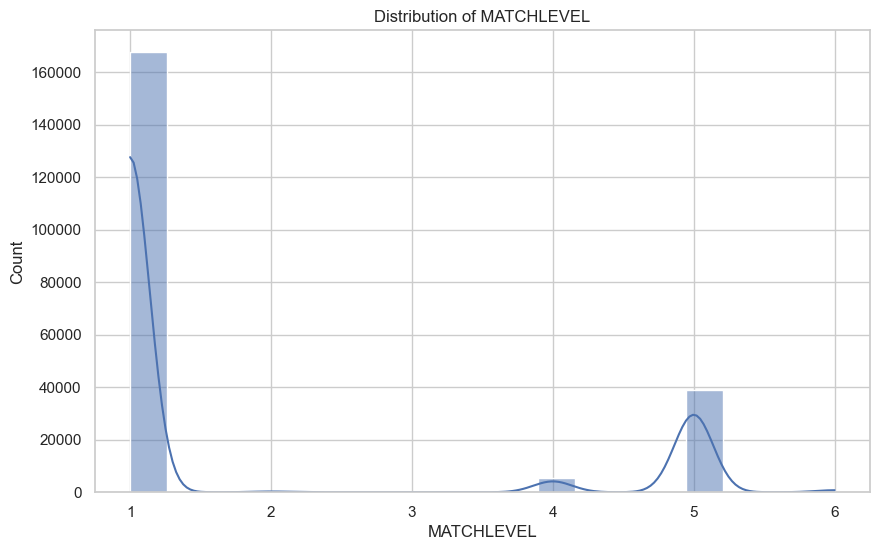

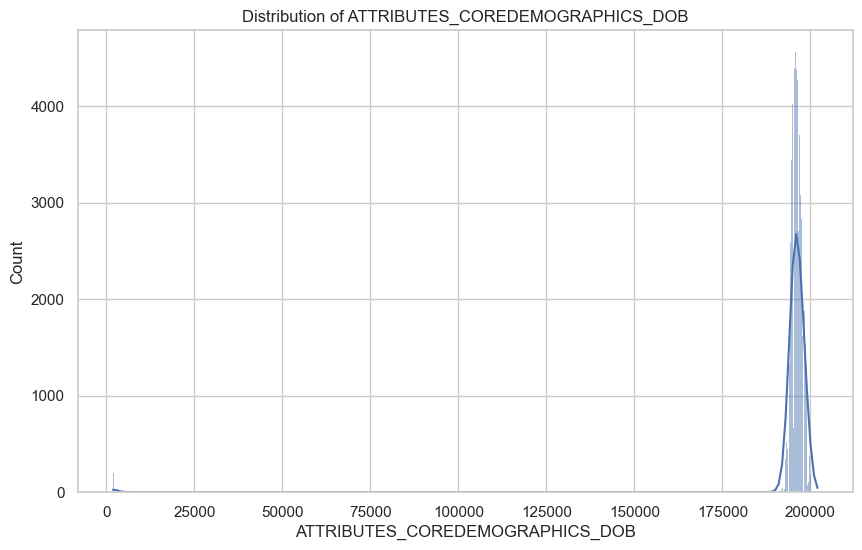

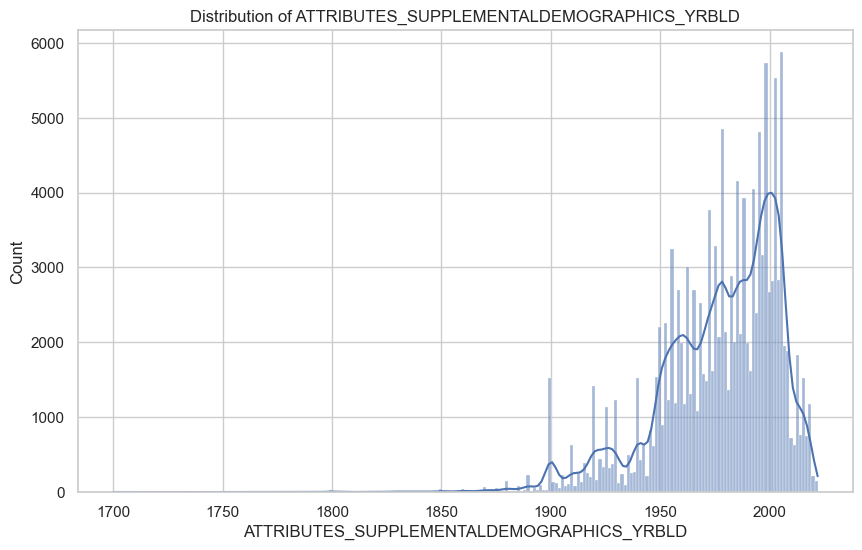

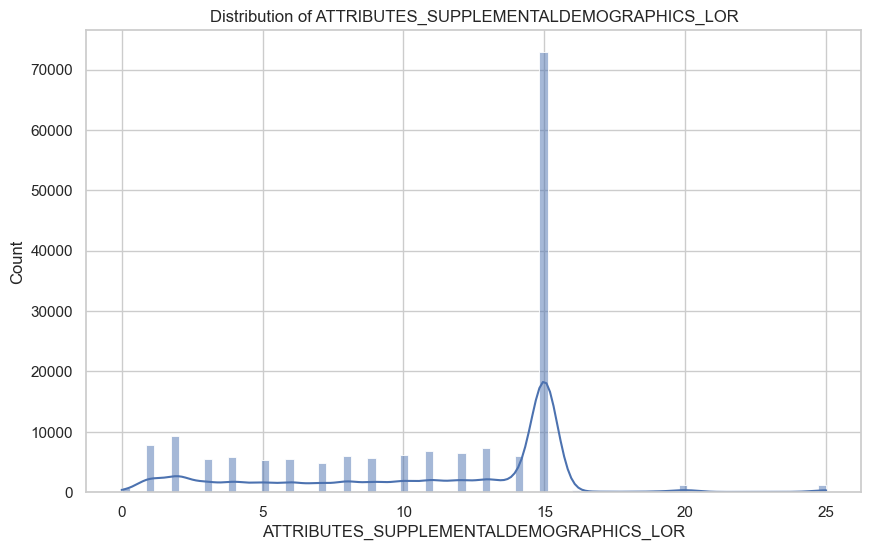

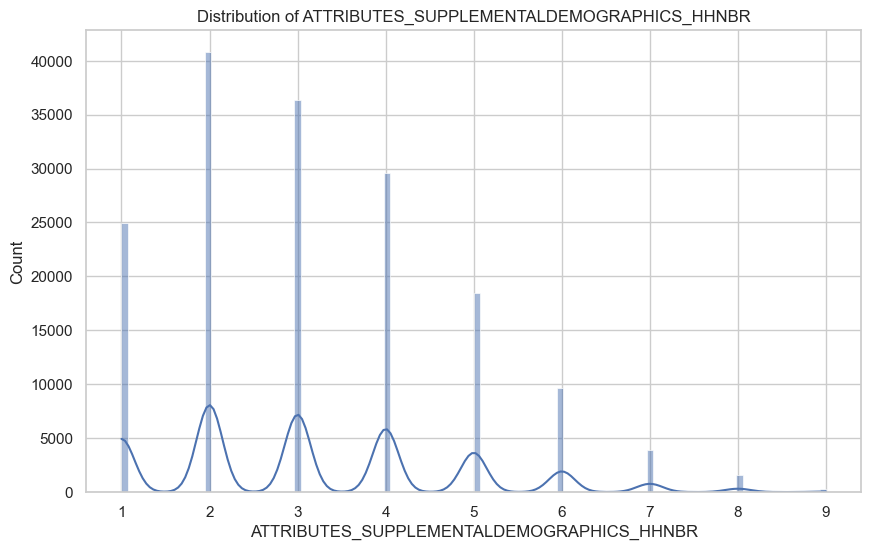

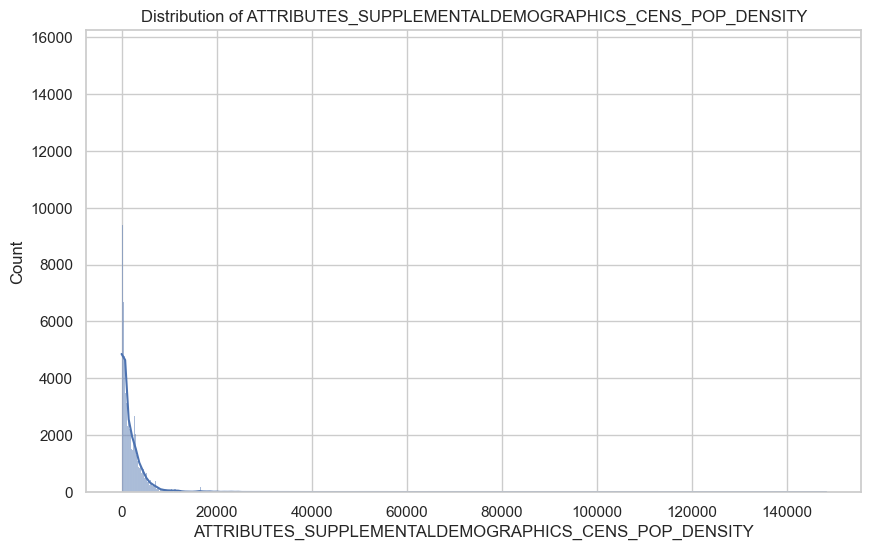

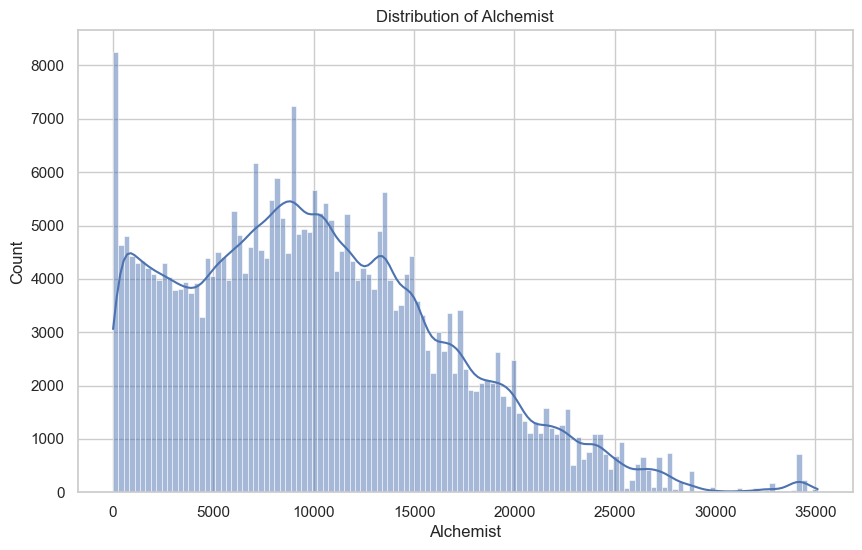

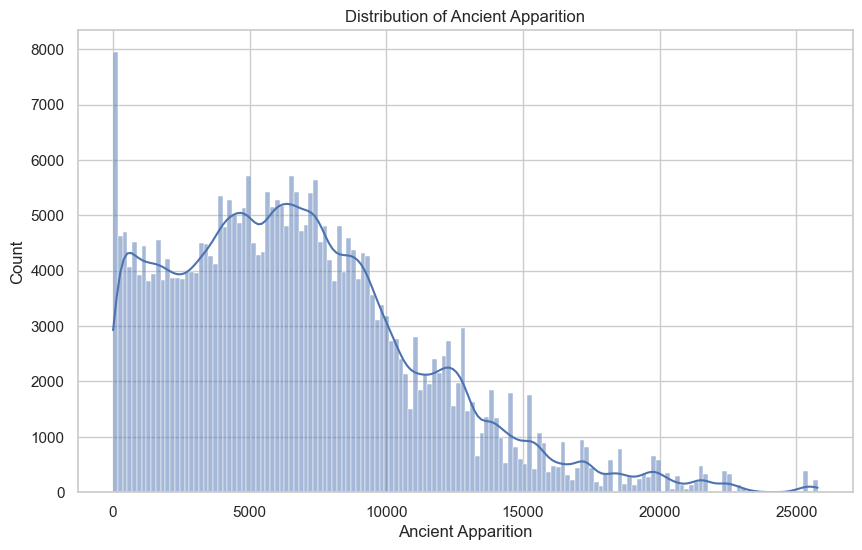

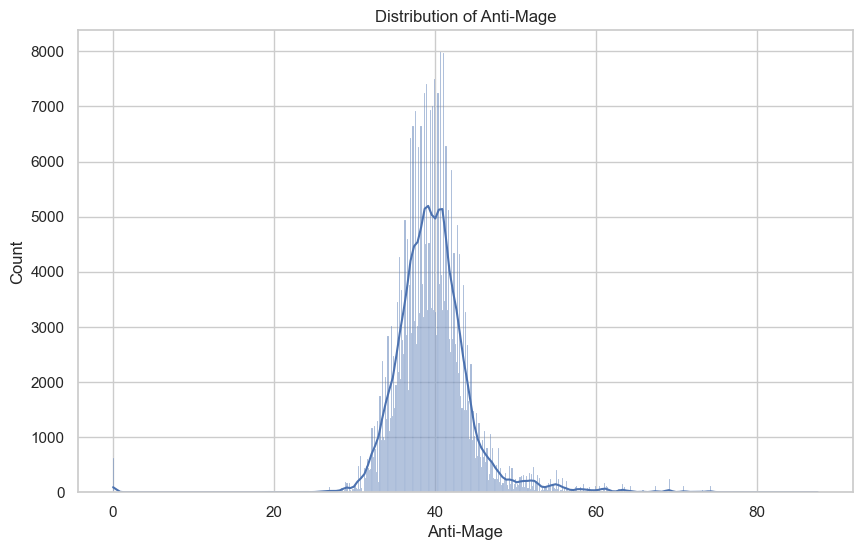

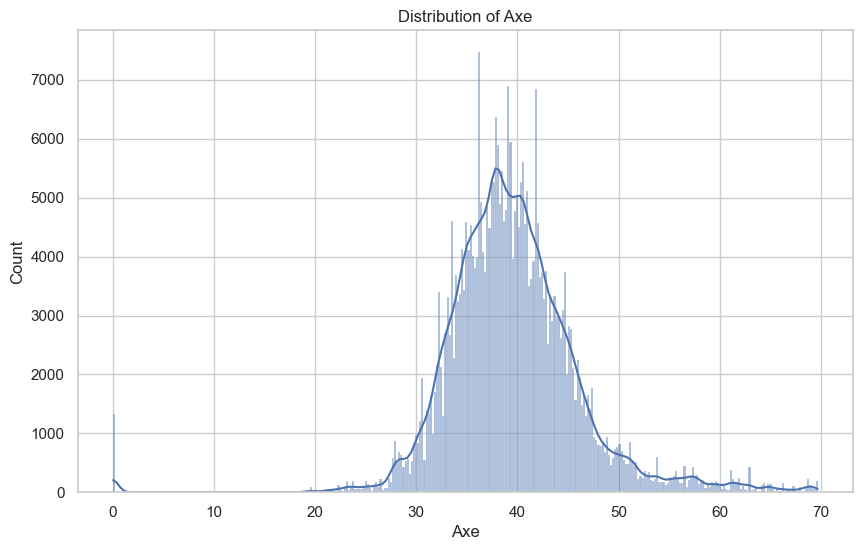

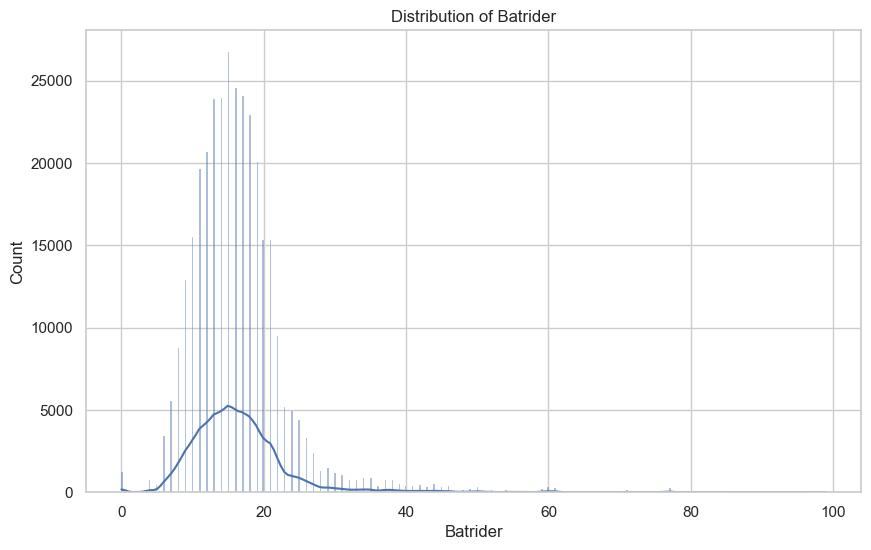

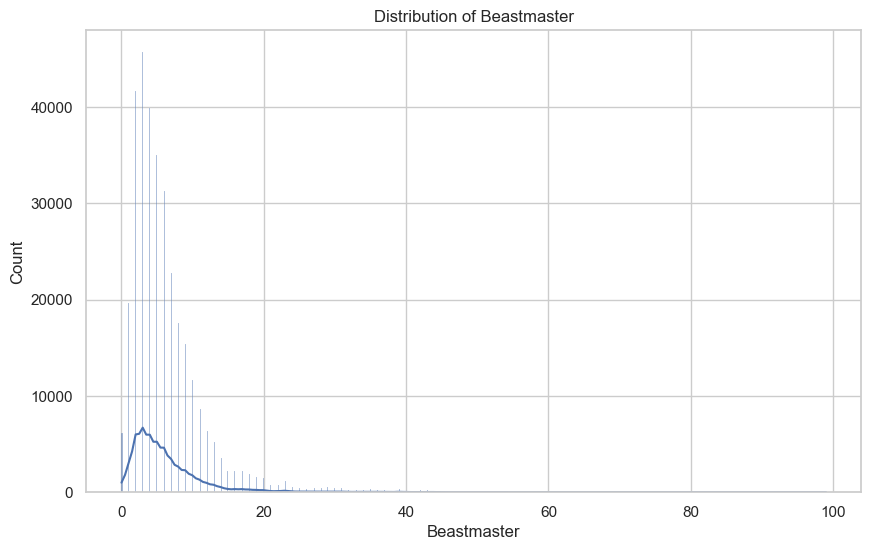

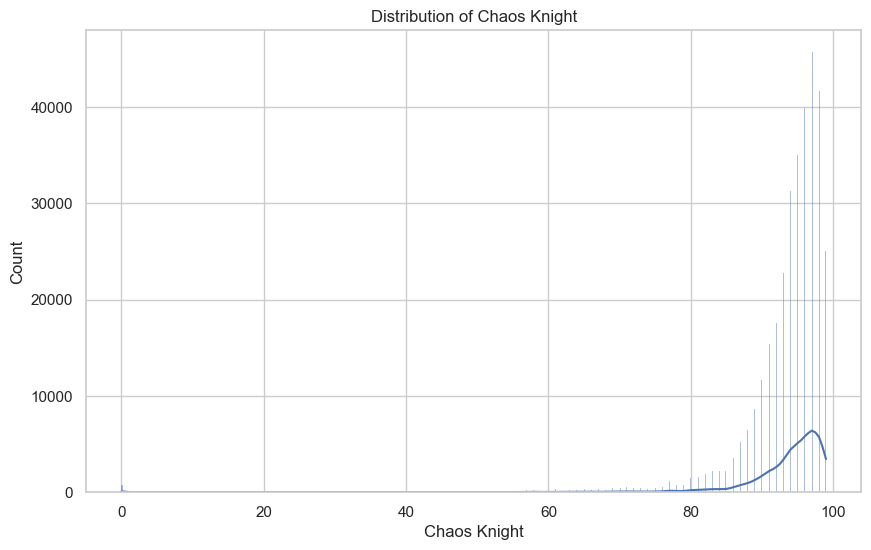

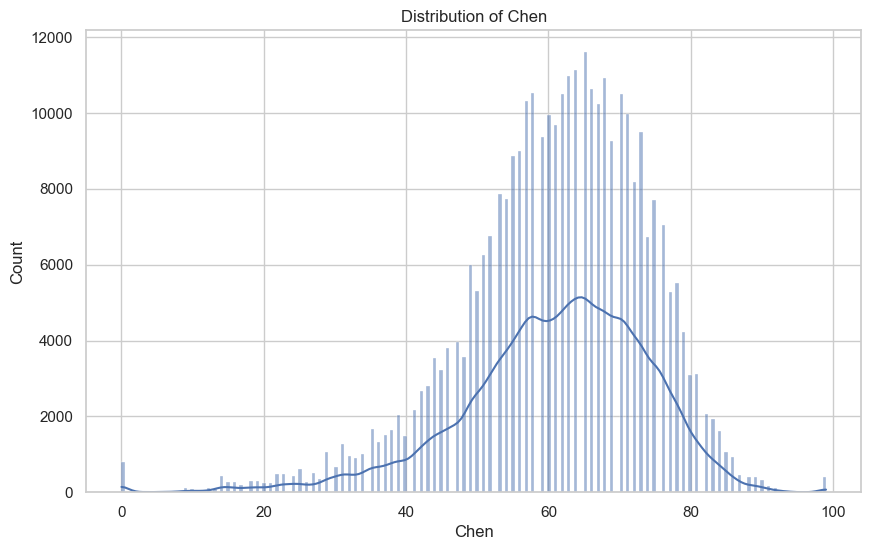

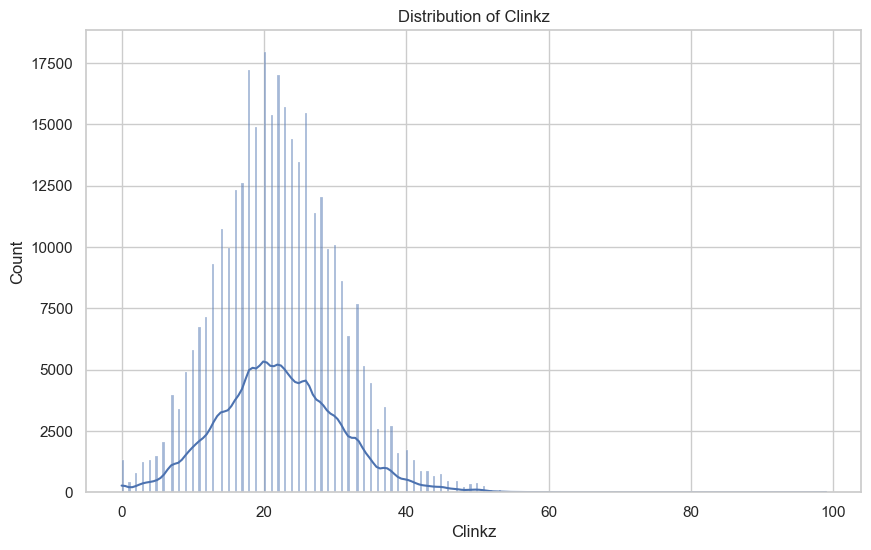

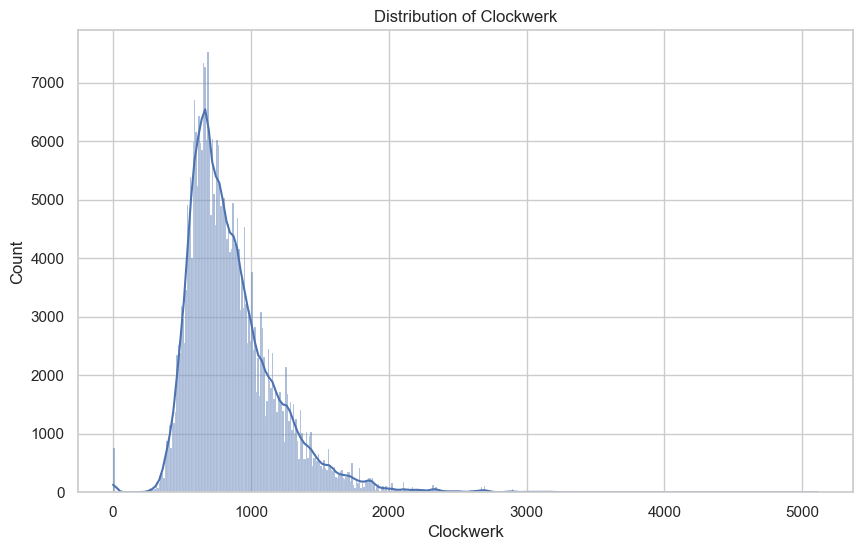

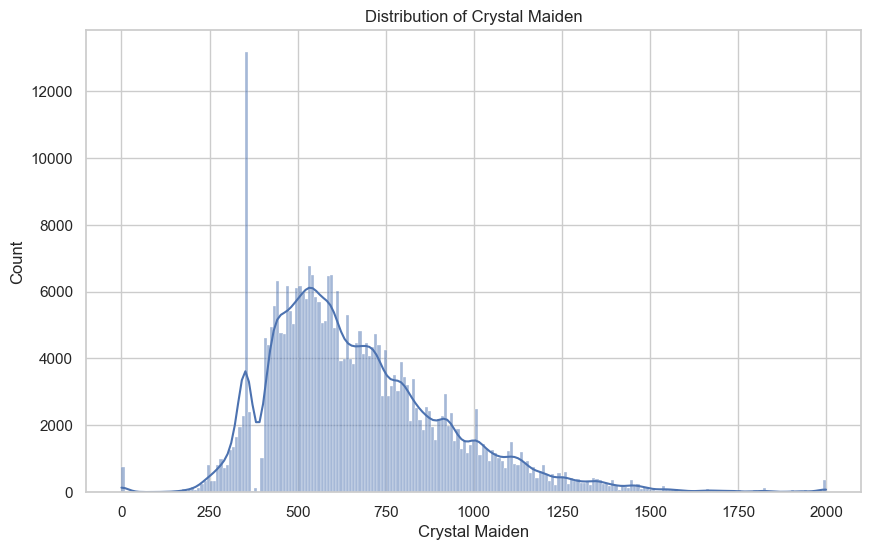

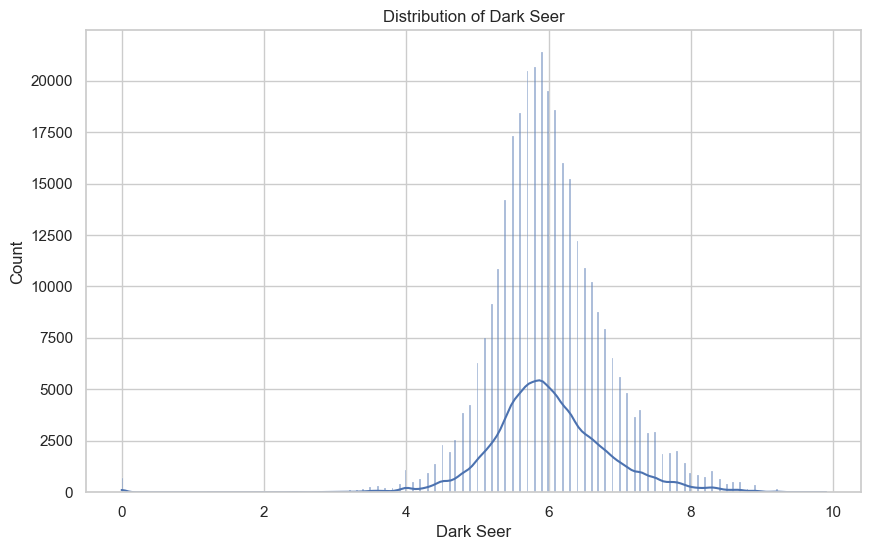

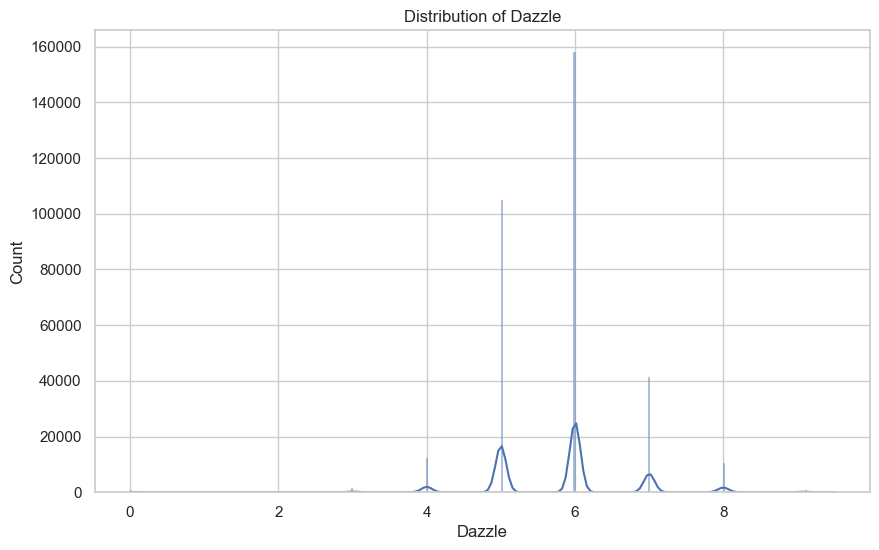

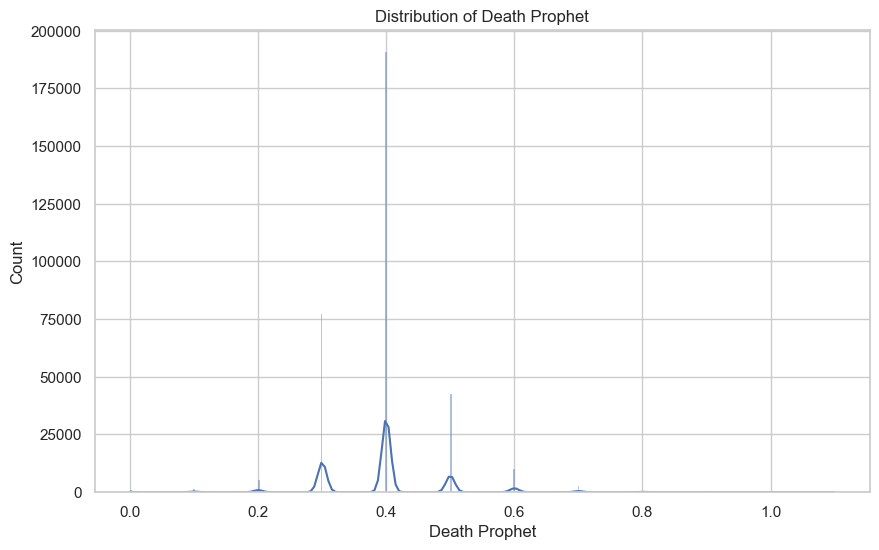

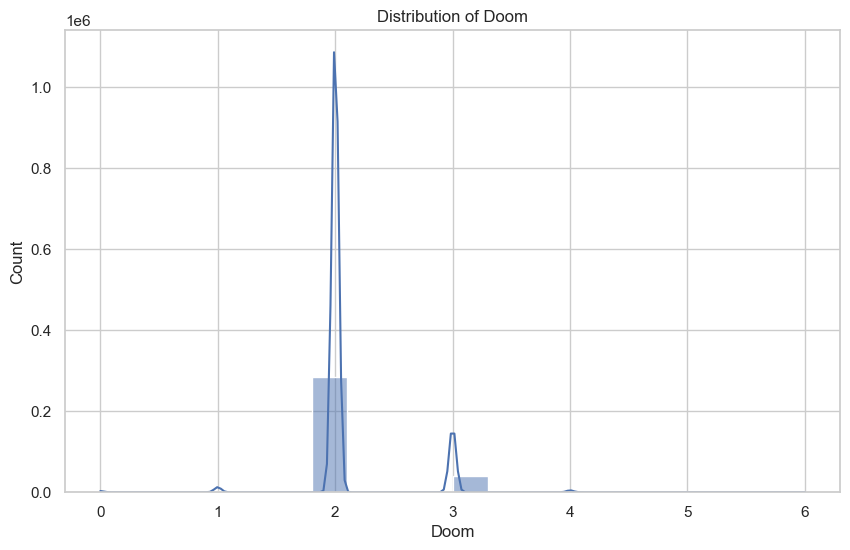

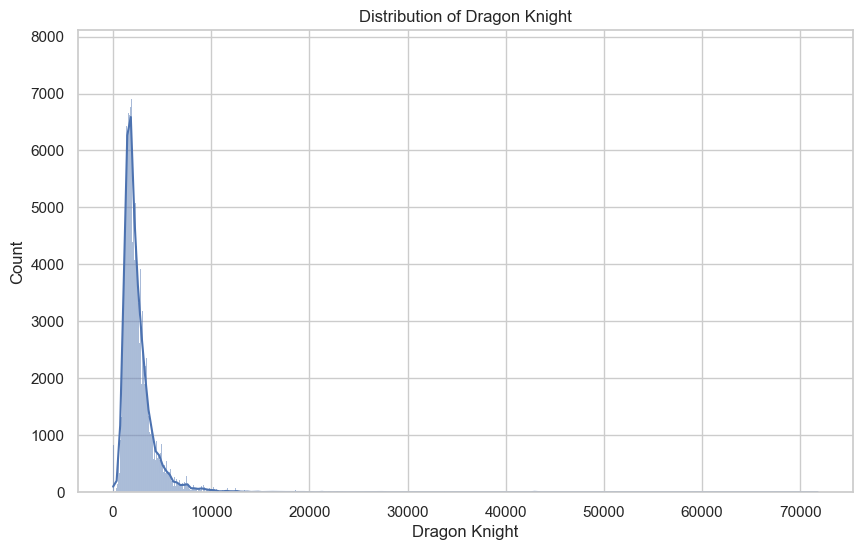

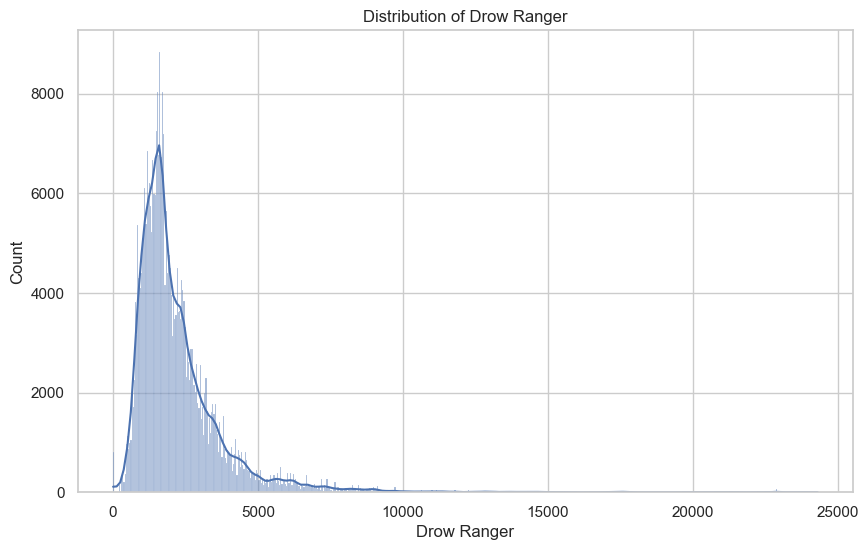

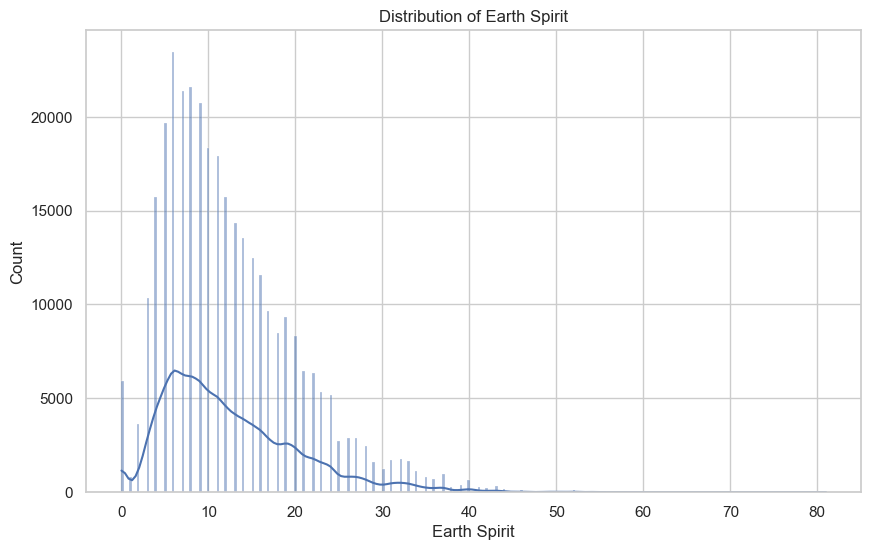

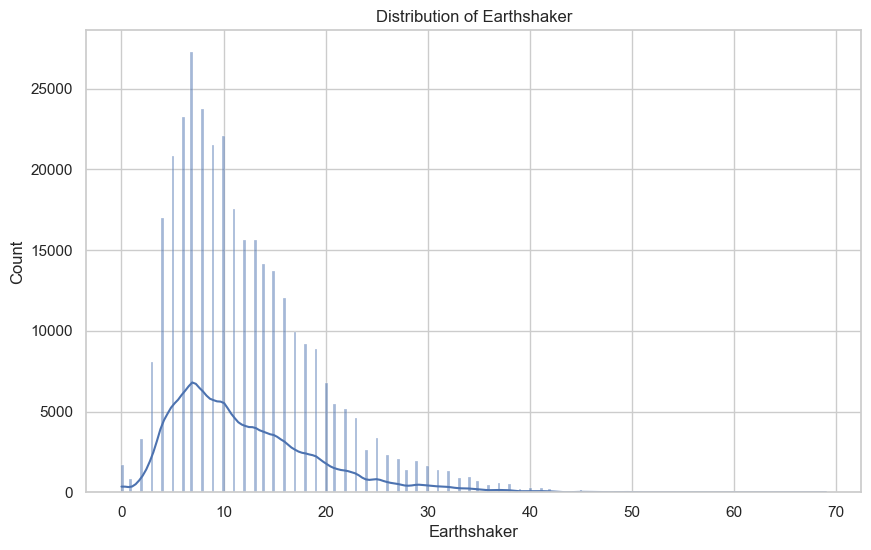

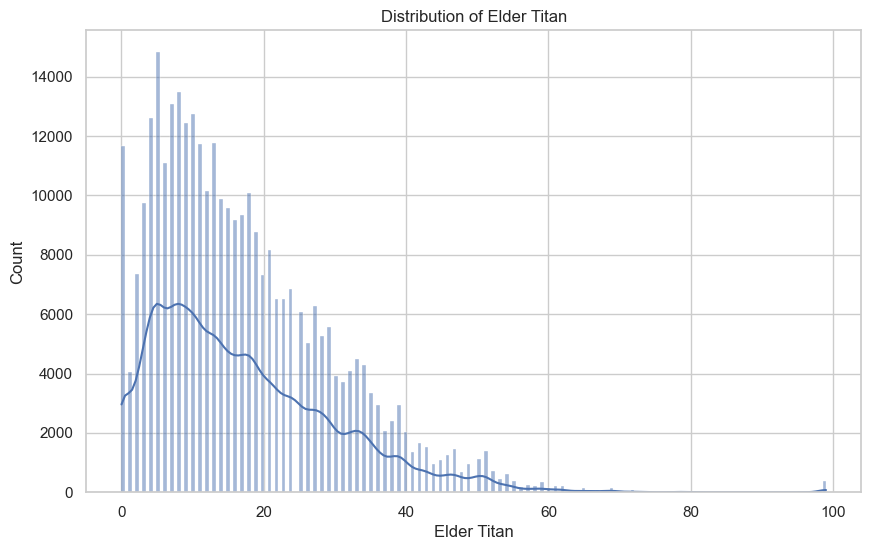

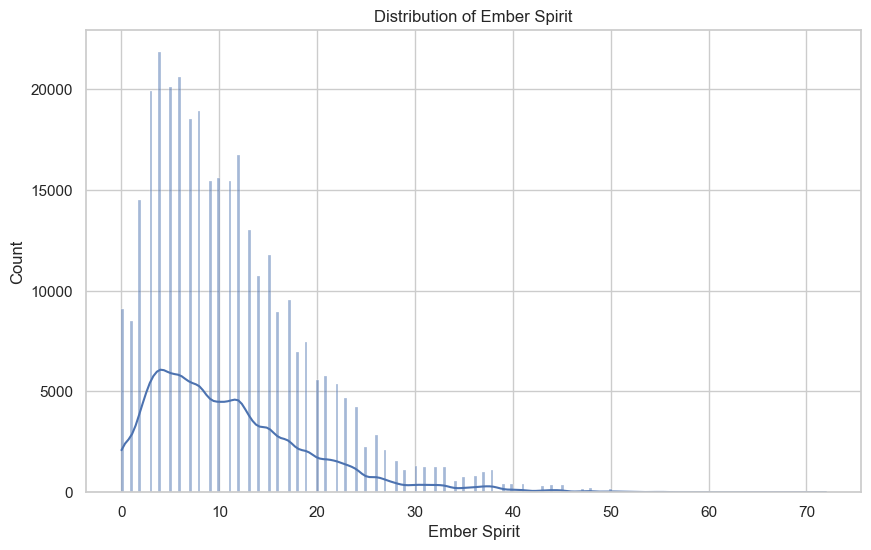

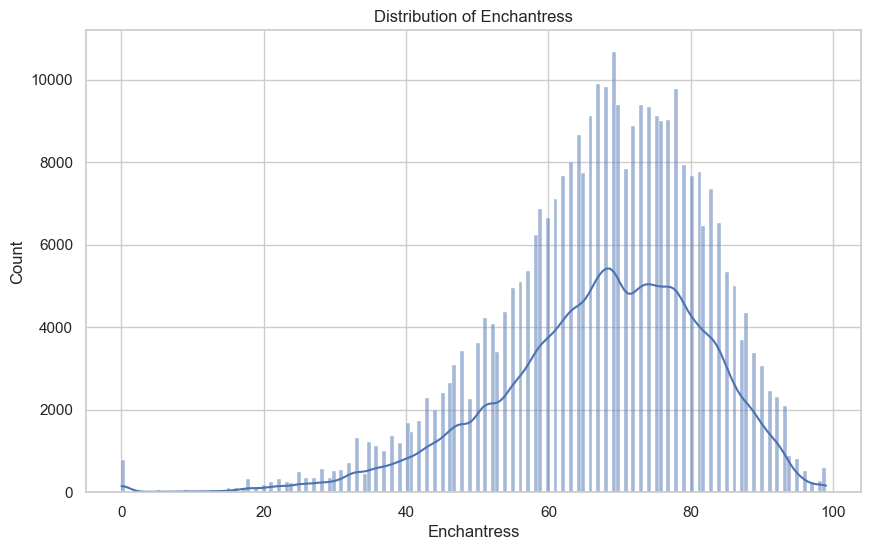

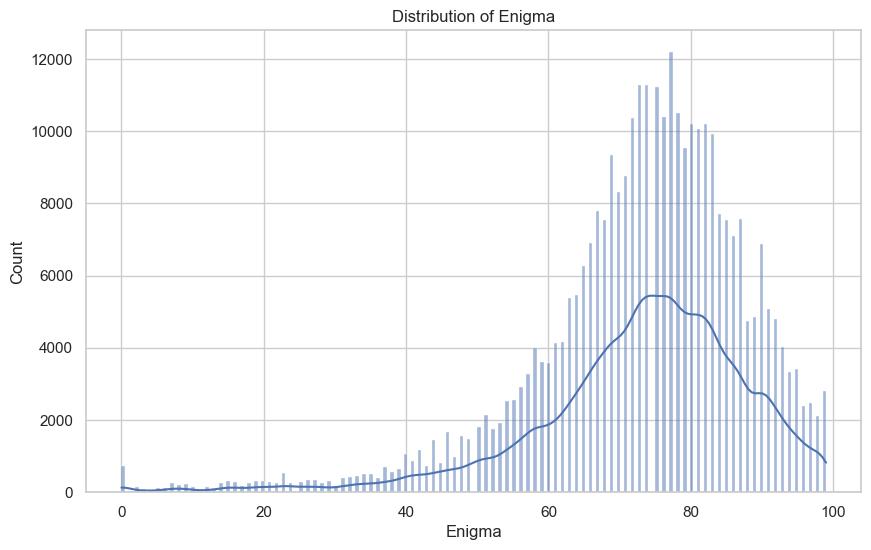

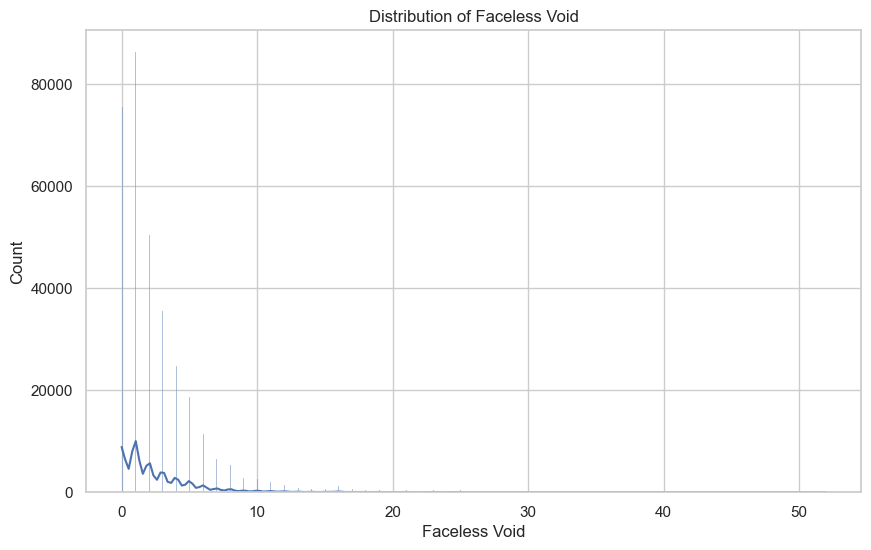

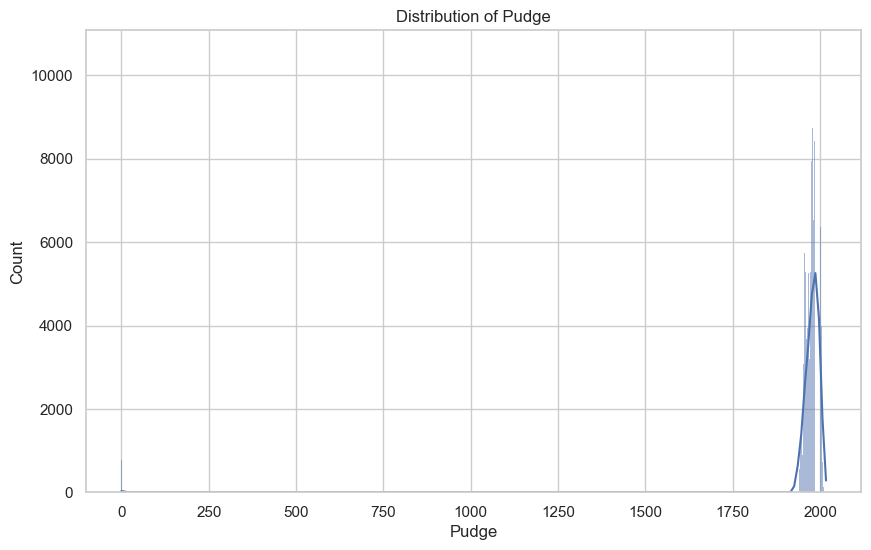

In [15]:
for col in numeric_columns:
    
    plt.figure(figsize=(10, 6))
    sns.histplot(clean_full_dataset[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

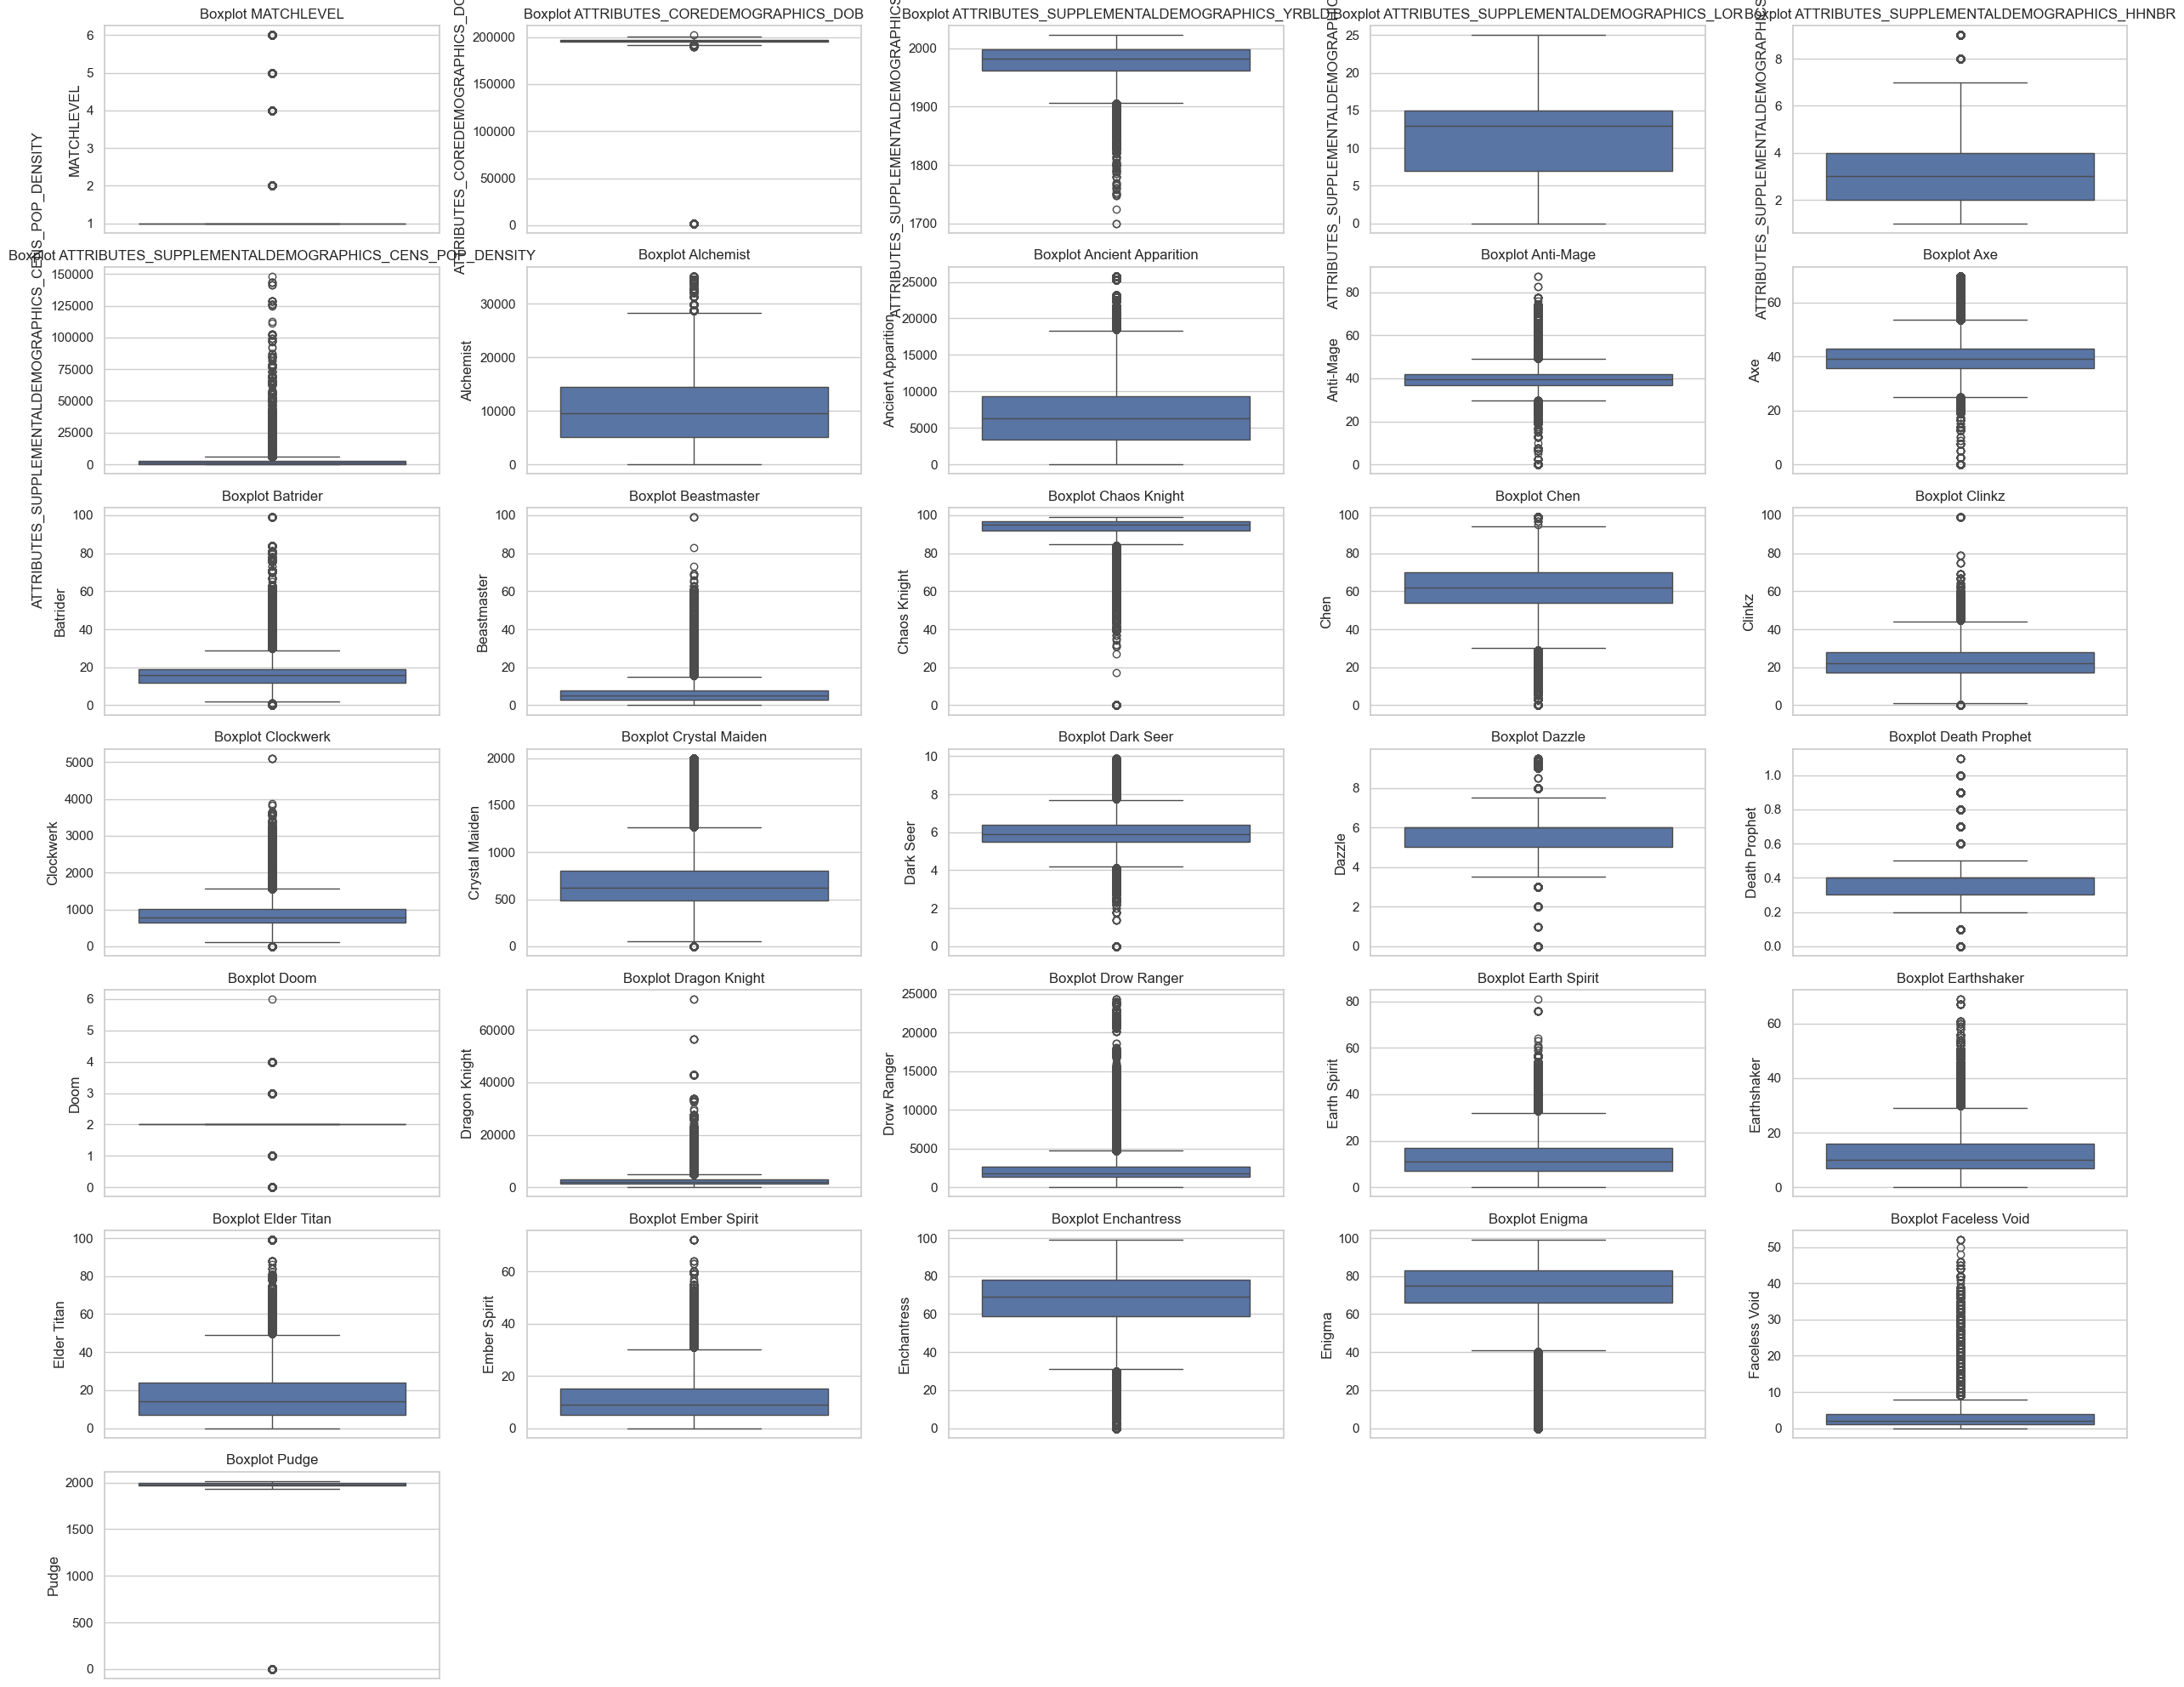

In [16]:
total_columns = len(numeric_columns)
rows = 7
columns_per_row = -(-total_columns // rows)

plt.figure(figsize=(25, 20))

# Criando os boxplots em 4 linhas
for i, var in enumerate(numeric_columns, start=1):
    plt.subplot(rows, columns_per_row, i)
    sns.boxplot(y=var, data=clean_full_dataset)
    plt.title(f'Boxplot {var}')

plt.tight_layout()
plt.show()


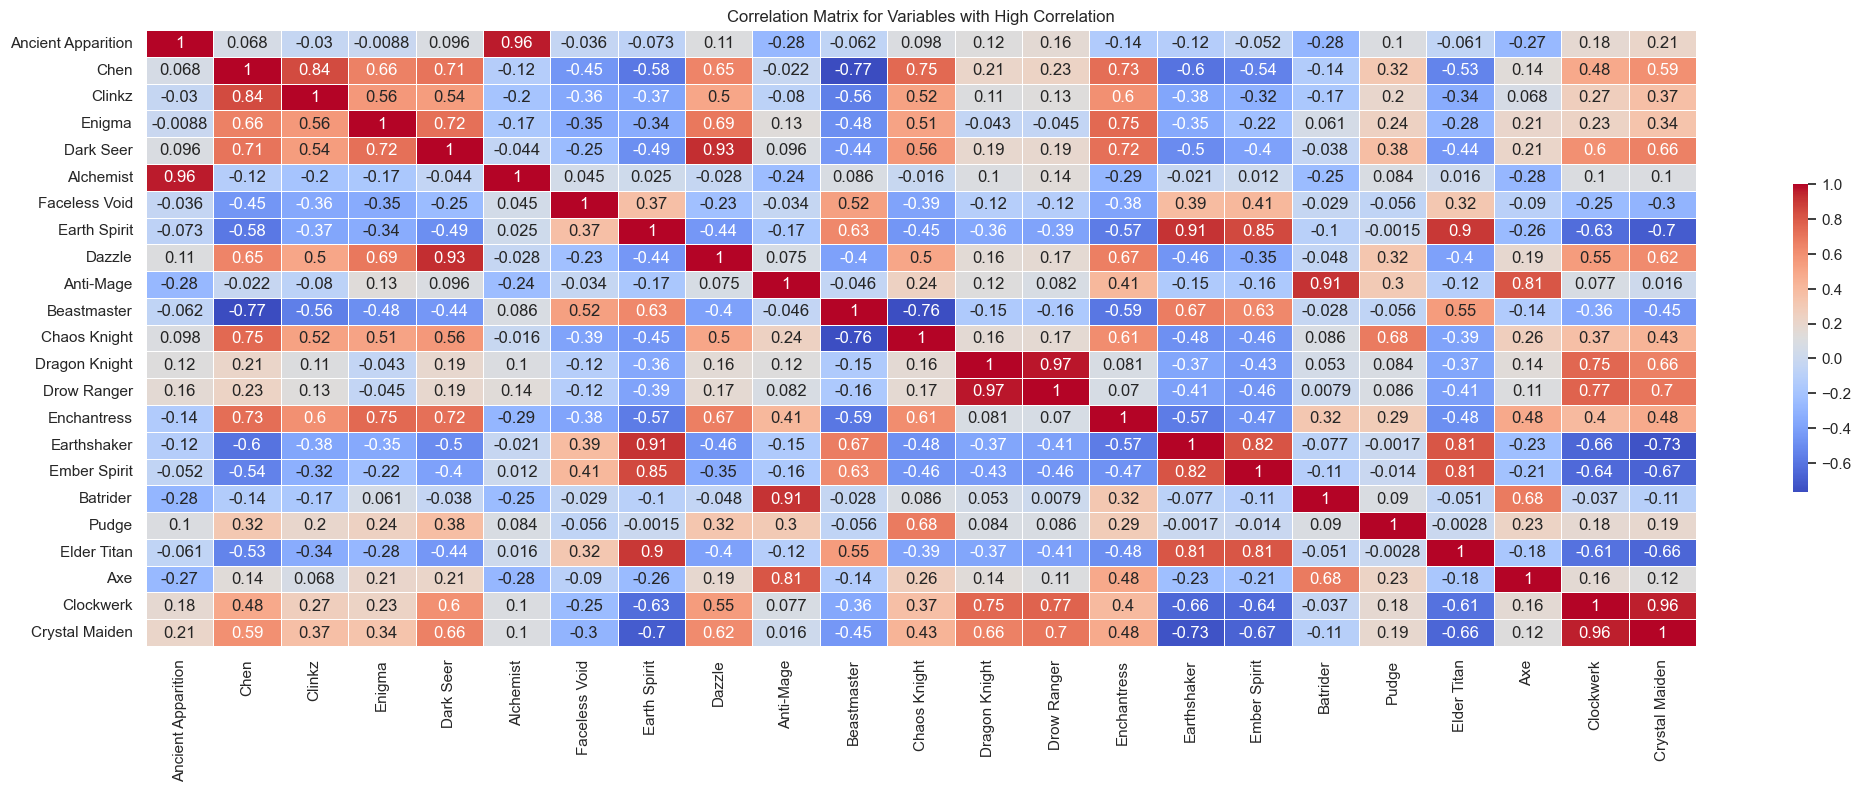

In [17]:
threshold = 0.5
corr_matrix = clean_full_dataset[numeric_columns].corr()
corr_pairs = corr_matrix.unstack()
high_corr_pairs = corr_pairs[(abs(corr_pairs) > threshold) & (abs(corr_pairs) < 1)]

high_corr_vars = list(set([item[0] for item in high_corr_pairs.index] + [item[1] for item in high_corr_pairs.index]))

filtered_high_corr_matrix = clean_full_dataset[high_corr_vars].corr()

plt.figure(figsize=(25, 8))
sns.heatmap(filtered_high_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for Variables with High Correlation')
plt.show()

## 4.0 - Data processing
### 4.1 Null filling

In [18]:
for col in numeric_columns:
    clean_full_dataset[col].fillna(clean_full_dataset[col].median(), inplace=True)

for col in categorical_columns:
    clean_full_dataset[col].fillna("MISSING", inplace=True)

In [19]:
clean_full_dataset

,HASHED_PHONE_NUMBER,IS_APPOINTMENT_SET,LEAD_CREATED_AT_UTC,ZIP_CODE,CITY,STATE,COUNTY,EMAIL_DOMAIN,OPERATINGSYSTEMCLASS,OPERATINGSYSTEMNAME,...,Dragon Knight,Drow Ranger,Earth Spirit,Earthshaker,Elder Titan,Ember Spirit,Enchantress,Enigma,Faceless Void,Pudge
0,16bc446a779996bf3007065819f1dd4692a17d14,True,2023-07-18T15:11:55Z,61080.0,South Beloit,IL,Winnebago,gmail.com,Mobile,Android,...,1385.0,1244.0,7.0,10.0,13.0,4.0,71.0,87.0,3.0,1984.0
1,6d30f0d0f87d39f8c178e3750072eef79bb9d7a0,False,2022-09-19T18:37:21Z,33914.0,Cape Coral,FL,Lee,gmail.com,Mobile,iOS,...,3253.0,2845.0,9.0,8.0,15.0,6.0,78.0,83.0,3.0,1998.0
2,9de207ef32d3696829ae369c2a9a4500cd36ec43,True,2022-11-09T21:38:10Z,42055.0,Kuttawa,KY,Lyon,gmail.com,Mobile,Android,...,1400.0,1098.0,16.0,6.0,31.0,12.0,91.0,60.0,0.0,1981.0
3,31bb43ece722562df3a163ba94be4eb2ccd1bf71,False,2022-11-13T15:41:31Z,43701.0,Zanesville,OH,Muskingum,gmail.com,Mobile,iOS,...,1464.0,1140.0,20.0,18.0,33.0,23.0,63.0,72.0,4.0,1964.0
4,674de0e7b4da1c9945422b248f94cbf2499d59e2,False,2022-10-07T17:56:51Z,22206.0,Arlington,VA,Arlington,gmail.com,Mobile,iOS,...,4399.0,4375.0,4.0,3.0,4.0,2.0,55.0,45.0,1.0,1948.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331682,85580be57f0c2e3785ffe5b6187441487915513b,True,2023-07-10T13:55:13Z,2151.0,Revere,MA,Suffolk,yahoo.com,Mobile,iOS,...,3733.0,3749.0,13.0,13.0,18.0,14.0,51.0,35.0,27.0,1953.0
331683,8e7eed2ca3dd2e5a0f27fb3288e0157471a5f81b,False,2023-05-12T13:54:23Z,3867.0,Rochester,NH,Strafford,icloud.com,Desktop,Mac OS,...,2101.0,1775.0,10.0,11.0,12.0,14.0,67.0,56.0,6.0,1975.0
331684,f1864c915f0cdf097a794f50a027f84af31f79b2,False,2023-04-25T20:08:59Z,89084.0,North Las Vegas,NV,Clark,juno.com,Mobile,Android,...,2721.0,3098.0,6.0,7.0,7.0,7.0,68.0,87.0,0.0,2005.0
331685,e69897a60b18857a0e63558f3a86051321f16acf,False,2023-02-02T20:22:57Z,44663.0,New Philadelphia,OH,Tuscarawas,live.com,Mobile,Android,...,1316.0,1245.0,18.0,19.0,39.0,15.0,57.0,65.0,8.0,1967.0


### 4.2 Ecoding Data

In [20]:
clean_full_dataset = clean_full_dataset.drop(columns=['HASHED_PHONE_NUMBER'])

X = clean_full_dataset.drop(columns=['IS_APPOINTMENT_SET'])
y = clean_full_dataset['IS_APPOINTMENT_SET'].map({'True': 1, 'False': 0})

In [21]:
# Standardizing numeric variables between 0 and 1

scaler = MinMaxScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [22]:
categorical_columns.remove('HASHED_PHONE_NUMBER')
categorical_columns.remove('IS_APPOINTMENT_SET')

# Applying LabelEncoder to categorical variables
label_encoder = LabelEncoder()

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])


### 4.3 - Check unbalance proportion

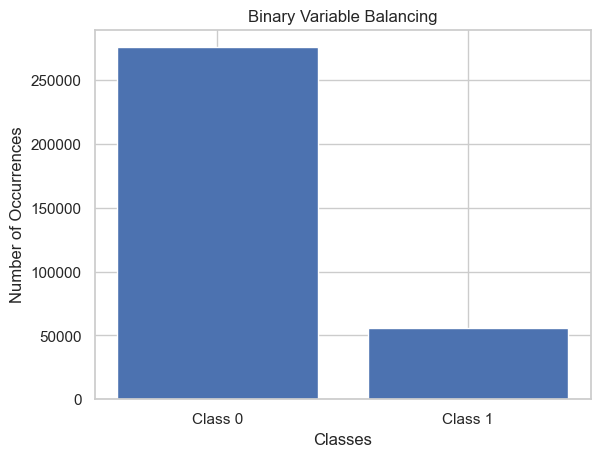

In [23]:
def show_proportion_binary_var(y):

    counts = y.value_counts()

    # Plota o gráfico de barras
    plt.bar(counts.index, counts.values)
    plt.xlabel('Classes')
    plt.ylabel('Number of Occurrences')
    plt.title('Binary Variable Balancing')
    plt.xticks(counts.index, ['Class 0', 'Class 1'])
    plt.show()
    
show_proportion_binary_var(y)

In [24]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 4.3.1 - Data Balancing

In [25]:
adasyn = ADASYN(random_state=42)

mask = y_train.notna()  # Cria uma máscara para linhas não-NaN
X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

# Applying ADASYN only to the training set to avoid information leakage to the test
X_resampled, y_resampled = adasyn.fit_resample(X_train_clean, y_train_clean)

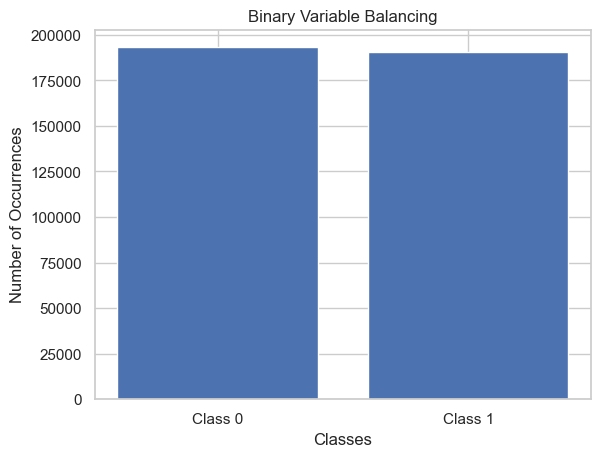

In [26]:
show_proportion_binary_var(y_resampled)

## 5.0 - Feature Engineering
### 5.1 - Selecting best features for the model automatically

In [27]:
forest = RandomForestClassifier(n_estimators=50, random_state=42, verbose=True)
forest.fit(X_resampled, y_resampled)
importances = forest.feature_importances_

# Ordering features by importance
indices = np.argsort(importances)[::-1]
sorted_features = [X_resampled.columns[i] for i in indices]
sorted_importances = importances[indices]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


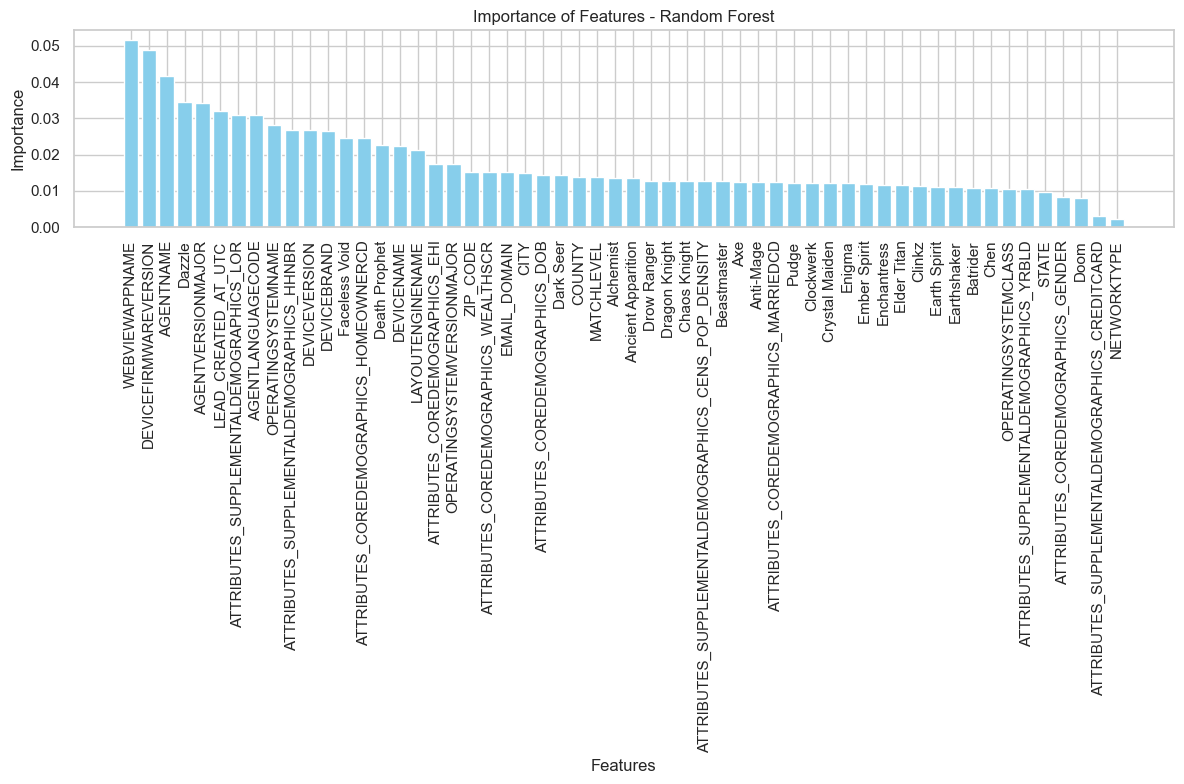

In [28]:
plt.figure(figsize=(12, 8))
plt.title('Importance of Features - Random Forest')
plt.bar(range(X_resampled.shape[1]), sorted_importances, color='skyblue', align='center')
plt.xticks(range(X_resampled.shape[1]), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [29]:
def run_feature_selection_experiment(X_train, y_train, X_test, y_test, feature_importances, n_iterations=10):
    indices = np.argsort(feature_importances)[::-1]
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    results = []    
    for n_features in range(1, n_iterations + 1):

        selected_features = indices[:n_features]
        X_train_selected = X_train[:, selected_features]
        X_test_selected = X_test[:, selected_features]
        
        # Training the model with the current subset of features
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train_selected, y_train)
        
        # Evaluating the model
        y_pred = model.predict(X_test_selected)
        score = balanced_accuracy_score(y_test, y_pred)
        
        results.append({'N_Features': n_features, 'Balanced_Accuracy': score})
    
    # Convertendo resultados em DataFrame para análise
    results_df = pd.DataFrame(results)
    
    return results_df

In [30]:
results_df = run_feature_selection_experiment(X_resampled.values, 
                                              y_resampled, X_test.values, y_test,
                                              importances, n_iterations=X.shape[1])

### 5.2 - Analysis of features used

Analysis of the use of the most important features indicates that the use of the 25 most relevant features is sufficient to obtain the best results from the model.




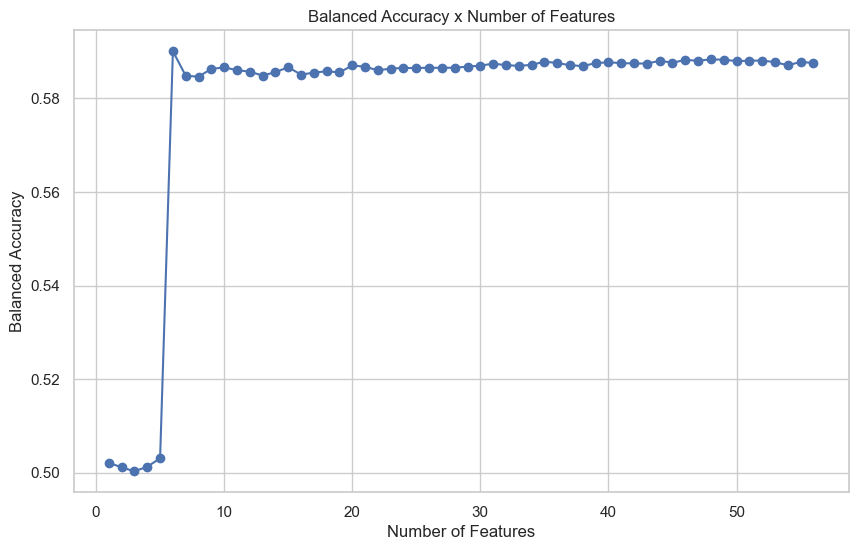

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['N_Features'], results_df['Balanced_Accuracy'], marker='o')
plt.title('Balanced Accuracy x Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Balanced Accuracy')
plt.grid(True)
plt.show()

### 5.2.1 - Most relevant features

Below we have a list of the 20 most important features for the model

In [32]:
# Finding the optimal number of features
optimal_n_features = results_df.sort_values(by='Balanced_Accuracy', ascending=False).iloc[0]['N_Features']

best_features = np.argsort(importances)[::-1][:int(optimal_n_features)]
print("Best features:", X.columns[best_features].tolist())
best_features_names = X.columns[best_features].tolist()

Best features: ['WEBVIEWAPPNAME', 'DEVICEFIRMWAREVERSION', 'AGENTNAME', 'Dazzle', 'AGENTVERSIONMAJOR', 'LEAD_CREATED_AT_UTC']


## 6.0 - Modeling

In [33]:
X_train = X_resampled.copy()
y_train = y_resampled.copy()

### 6.1 - Testing with different classifiers

In [34]:
classifiers = {
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [35]:
results = {}


for name, clf in classifiers.items():
    clf.fit(X_train[best_features_names], y_train)  # train classifier
    y_pred = clf.predict(X_test[best_features_names])
    score = balanced_accuracy_score(y_test, y_pred)
    results[name] = score
    print({'Algorithm': name, 'Score':score})

{'Algorithm': 'XGBoost', 'Score': 0.5019735499146021}
{'Algorithm': 'Random Forest', 'Score': 0.5900931044666546}
{'Algorithm': 'Gradient Boosting', 'Score': 0.5014073053821447}
{'Algorithm': 'AdaBoost', 'Score': 0.49702000322897416}
{'Algorithm': 'Logistic Regression', 'Score': 0.5193258741305915}
{'Algorithm': 'K-Nearest Neighbors', 'Score': 0.5544687854263644}


In [36]:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Balanced Accuracy'])
results_df.sort_values(by='Balanced Accuracy', ascending=False, inplace=True)

In [37]:
results_df

,Balanced Accuracy
Random Forest,0.590093
K-Nearest Neighbors,0.554469
Logistic Regression,0.519326
XGBoost,0.501974
Gradient Boosting,0.501407
AdaBoost,0.497020


In [38]:
# Identifying the champion algorithm based on the highest balanced accuracy
champion_algorithm = results_df.index[0]
champion_score = results_df.iloc[0]['Balanced Accuracy']

print(f"Champion algorithm: {champion_algorithm} with balanced accuracy {champion_score}")


Champion algorithm: Random Forest with balanced accuracy 0.5900931044666546


### 6.2 - Best Model: Random Forest

In [39]:
X_train = X_resampled.copy()
y_train = y_resampled.copy()

# Training the model with the current subset of features
model = RandomForestClassifier(random_state=42)
model.fit(X_train[best_features_names], y_train)

# Evaluating the model
y_pred = model.predict(X_test[best_features_names])
score = balanced_accuracy_score(y_test, y_pred)


In [40]:
score

0.5900931044666546

## 7.0 Results assessment

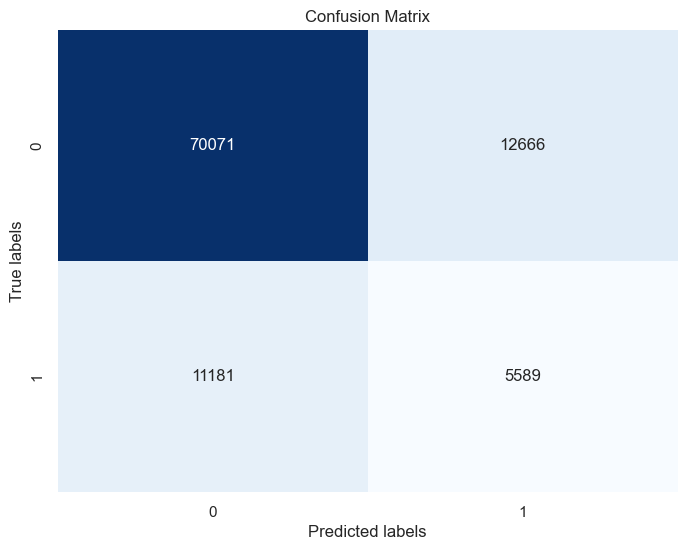

In [41]:
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## 8.0 - What I would do if I had more time:

* It would better investigate the imbalance of existing classes in the base
* Would run a hyperparameter optimization algorithm on the champion algorithm
* It would save the pre-trained model, as well as the base coding dictionary
* Would carry out a more complete exploratory analysis